In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']

In [ ]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [ ]:
numerical_feature

['math score', 'reading score', 'writing score']

In [ ]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [ ]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=round(df['total_score']/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [96]:
GroupA=df.loc[df['race/ethnicity']=='group A'].count()
GroupB=df.loc[df['race/ethnicity']=='group B'].count()
GroupC=df.loc[df['race/ethnicity']=='group C'].count()
GroupD=df.loc[df['race/ethnicity']=='group D'].count()
GroupE=df.loc[df['race/ethnicity']=='group E'].count()

In [99]:
labels_group=['Group A','Group B','Group C','Group D','Group E']
ethnic_group=[GroupA['race/ethnicity'],GroupB['race/ethnicity'],GroupC['race/ethnicity'],GroupD['race/ethnicity'],GroupE['race/ethnicity']]

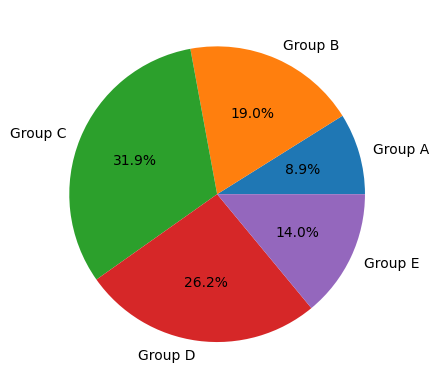

In [101]:
plt.pie(ethnic_group,labels=labels_group,autopct='%0.1f%%');

## Insights
- Group C and Group D has the majority percentage in the dataset

<Axes: xlabel='average', ylabel='Count'>

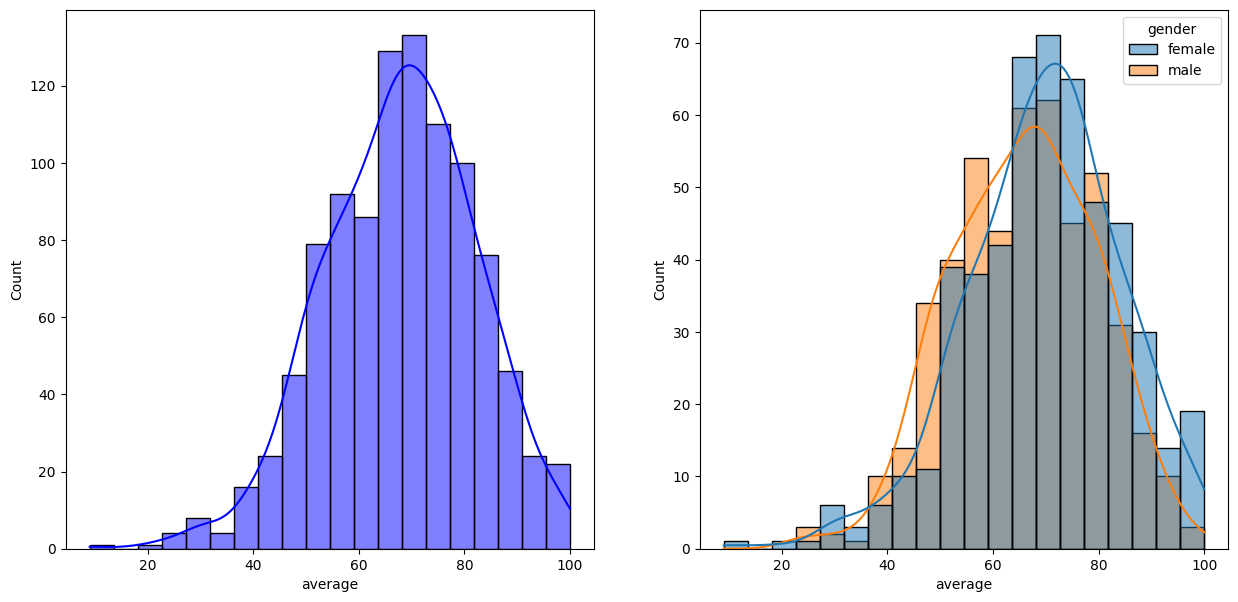

In [ ]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=20,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=20,kde=True,hue='gender')

#Insights
Female tends to perform well than male students

<Axes: xlabel='average', ylabel='Count'>

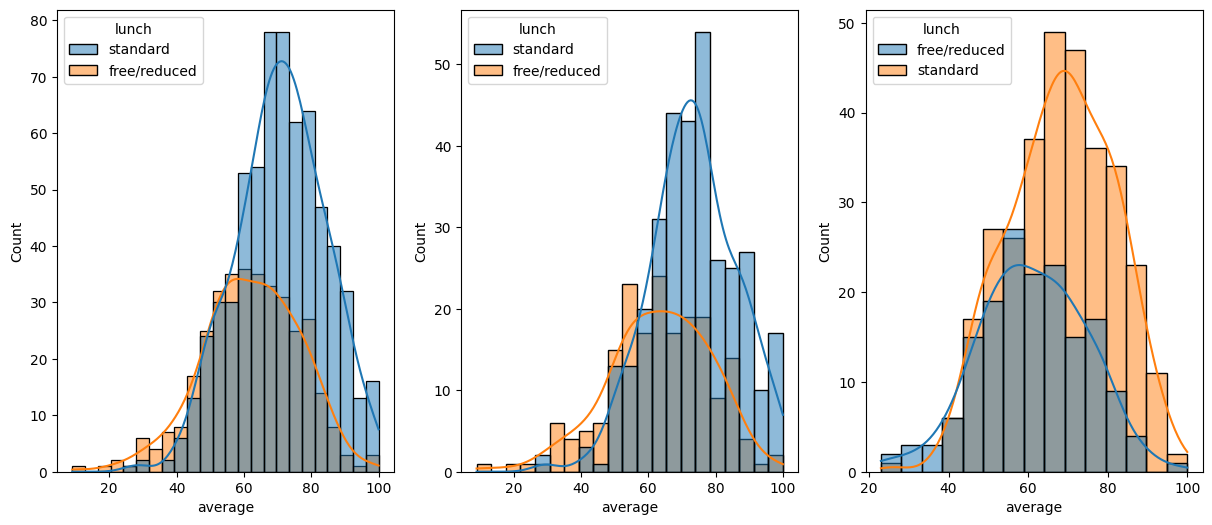

In [ ]:
fig,axis=plt.subplots(1,3,figsize=(20,6))
axis[0].remove()
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
axis[1].remove()
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
axis[2].remove()
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

#Insights
Standard lunch helps student perfrom well in exams irrespective of the gender.

<Axes: xlabel='average', ylabel='Count'>

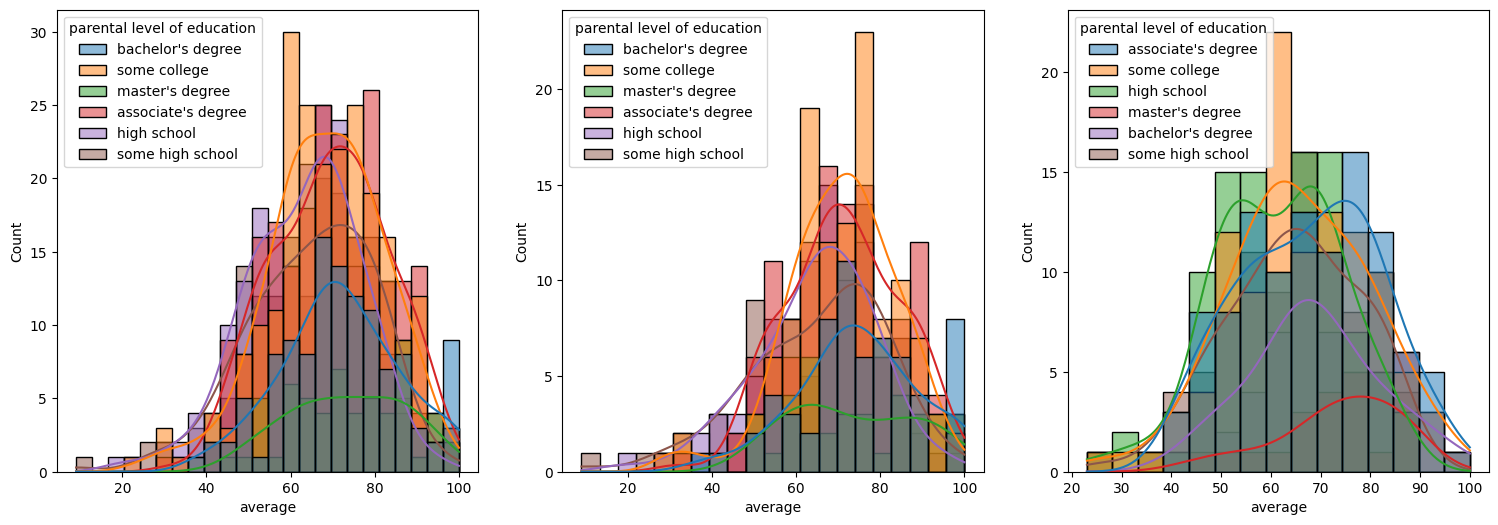

In [ ]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
axis[0].remove()
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
axis[1].remove()
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
axis[2].remove()
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

####Insights
- In general parent's educational background doesnot affect the child's performance
- In 2nd plot parents educational backgroud donot affect female child's perfromance in exams.
- In 3rd plot parents with associate's degree or master's dergree do have a positive affect on male child's perfromance in exams.

<Axes: xlabel='average', ylabel='Count'>

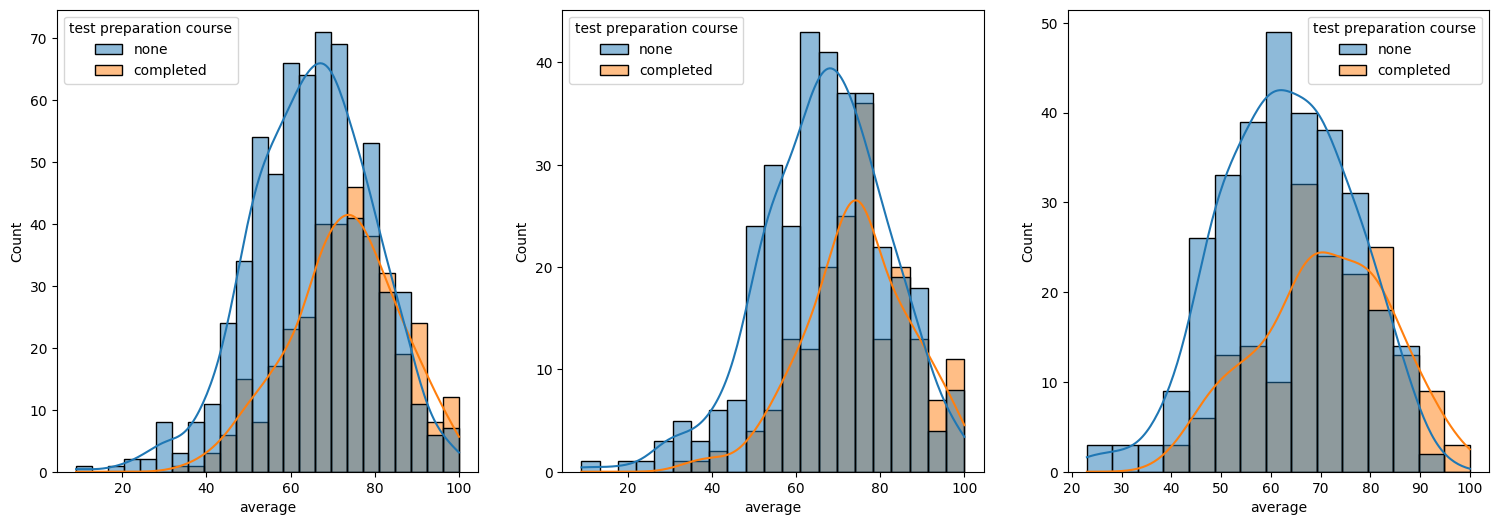

In [ ]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
axis[0].remove()
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='test preparation course')
axis[1].remove()
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test preparation course')
axis[2].remove()
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test preparation course')

###Insights
- Those completing a test preparation course have slightly better scoring average than others

<Axes: xlabel='average', ylabel='Count'>

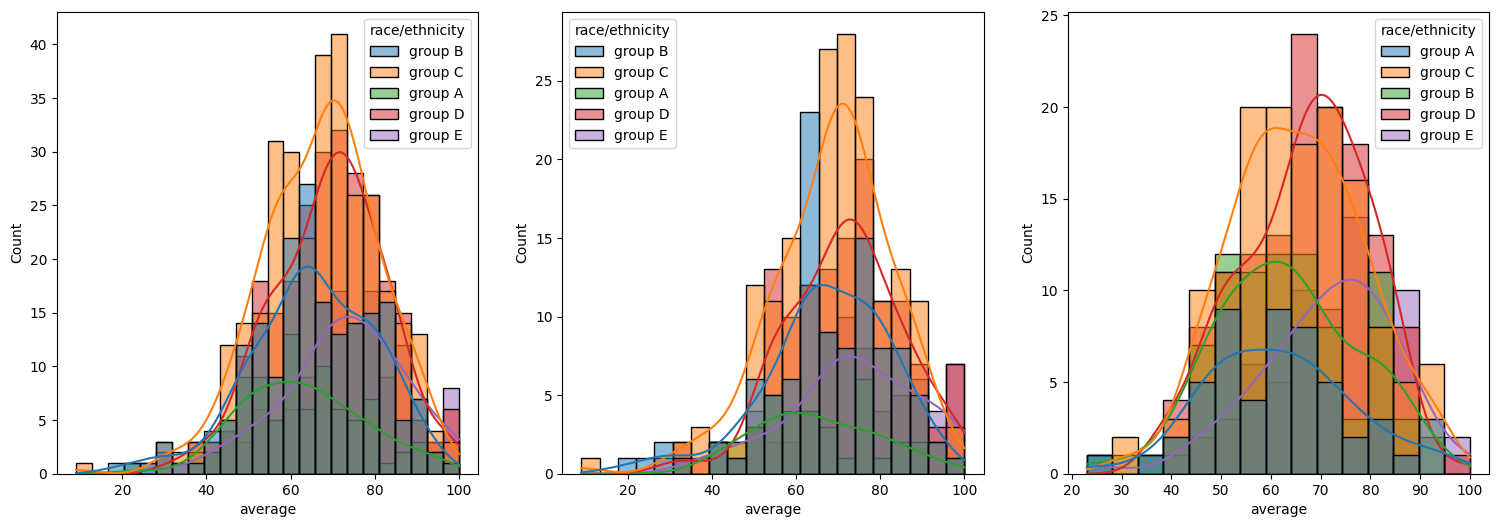

In [ ]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
axis[0].remove()
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
axis[1].remove()
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
axis[2].remove()
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

##Insights
- Students of group A and B tends to perfrom poorly in exam and this is true for both male and female students

<Axes: >

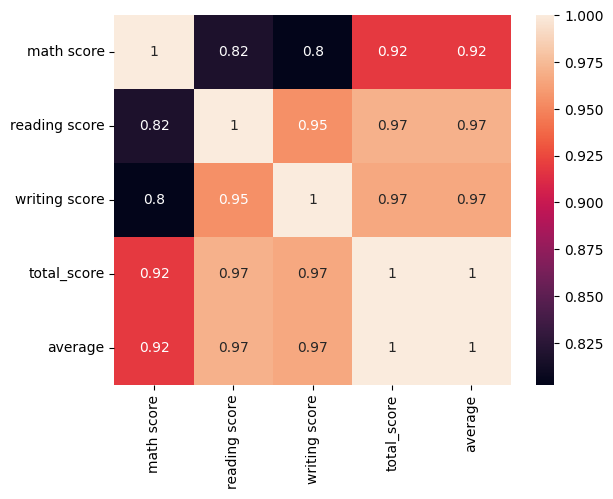

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Insights
- We can see positive correlation between the different columns